<a href="https://colab.research.google.com/github/thean16/-ml-models-or-price-prediction./blob/main/Copy_of_Build_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build_Model

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('Data_for_prediction.csv')
# Step 1: Load the Dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Prepare Features
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except Exception as e:
            print(f"Skipping invalid price range: {price_range_str}. Error: {e}")
            return 0.0, 0.0  # Default values for invalid ranges

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Select final features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min','Price_Range_Max']
    return df[features], df['Average Price']

# Prepare features and target
X, y = prepare_features(df)

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Step 3: Fit the Model using statsmodels
model = sm.OLS(y, X).fit()

# Step 4: Display Statistical Results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.370e+32
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        07:42:16   Log-Likelihood:                 8838.3
No. Observations:                 345   AIC:                        -1.766e+04
Df Residuals:                     339   BIC:                        -1.764e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.585e-12   3.58e-13  

 This is important because many machine learning algorithms are sensitive to the scale of the features. For example, if one feature has a
 much larger range than the other features, it can dominate the model and lead to poor
 performance.
 # There are two common methods for rescaling features: normalization and standardization.
 Normalization: Normalization scales the features so that they have a range of [0, 1].
 This is done by subtracting the minimum value of each feature from all of the values in the
 feature and then dividing by the range of the feature.


# Rescaling the Features

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Prepare Features
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0  # Handle invalid entries

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Select features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min', ]
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Step 3: Add a constant to the features
X = sm.add_constant(X)

# Step 4: Fit the OLS Model
model = sm.OLS(y, X).fit()

# Step 5: Display Summary of the Model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     327.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          2.92e-115
Time:                        07:42:17   Log-Likelihood:                -2926.3
No. Observations:                 345   AIC:                             5863.
Df Residuals:                     340   BIC:                             5882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1053.8057    223.546  

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Prepare Features
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except Exception as e:
            print(f"Skipping invalid price range: {price_range_str}. Error: {e}")
            return 0.0, 0.0  # Default values for invalid ranges

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Select final features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Max']
    return df[features], df['Average Price']

# Prepare features and target
X, y = prepare_features(df)

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Step 3: Fit the Model using statsmodels
model = sm.OLS(y, X).fit()

# Step 4: Display Statistical Results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.516e+04
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        07:42:17   Log-Likelihood:                -2303.7
No. Observations:                 345   AIC:                             4617.
Df Residuals:                     340   BIC:                             4637.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              213.8642     36.152  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


            feature        VIF
0             const  12.029360
1   Years from 2009   1.050851
2  Category_encoded   1.007799
3   Product_encoded   1.014869
4   Price_Range_Max   1.045175


In [ ]:
# Add a constant column for VIF calculation
X_with_constant = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display VIF results
print(vif_data)


            Feature        VIF
0             const  12.029360
1   Years from 2009   1.050851
2  Category_encoded   1.007799
3   Product_encoded   1.014869
4   Price_Range_Max   1.045175


In [ ]:
# Remove one feature at a time with high VIF and re-evaluate
X_revised = X_with_constant.drop(columns=['Price_Range_Max'])  # Example: Removing a high VIF column
model = sm.OLS(y, X_revised).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.934
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           0.000591
Time:                        07:42:17   Log-Likelihood:                -3190.1
No. Observations:                 345   AIC:                             6388.
Df Residuals:                     341   BIC:                             6404.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              402.3396    471.187  

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
file_path = 'Data_for_prediction.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare Features
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Final feature selection
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min', 'Price_Range_Max']
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Step 3: Apply RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)  # Select top 3 features
rfe.fit(X, y)

# Step 4: Selected Features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)


Selected Features by RFE: Index(['Category_encoded', 'Price_Range_Min', 'Price_Range_Max'], dtype='object')


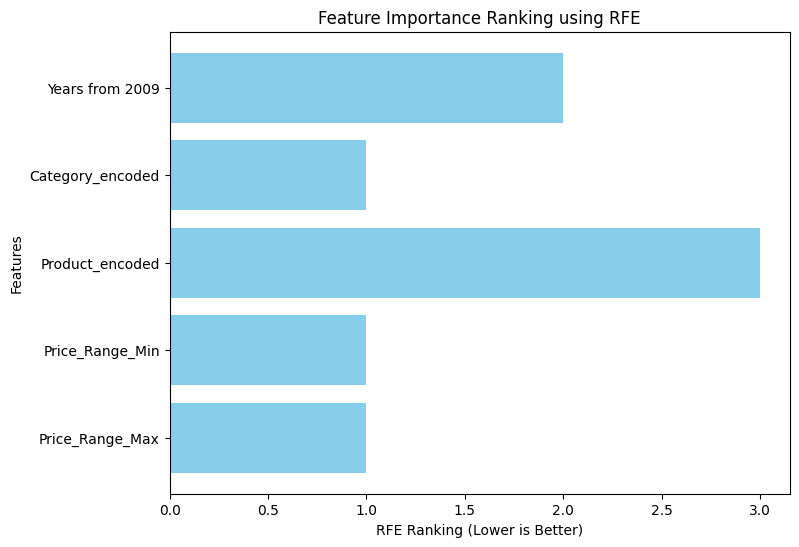

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature rankings from RFE
ranking = rfe.ranking_

# Plotting feature rankings
plt.figure(figsize=(8, 6))
plt.barh(X.columns, ranking, color='skyblue')
plt.xlabel('RFE Ranking (Lower is Better)')
plt.ylabel('Features')
plt.title('Feature Importance Ranking using RFE')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Prepare Features and Target
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0  # Handle invalid entries

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Final features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min', 'Price_Range_Max']
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5: Evaluate the Model
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Evaluation Metrics
print("Training Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")


Training Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.00

Testing Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.00


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.80
Mean Squared Error (MSE): 5.60
R² Score: 0.93


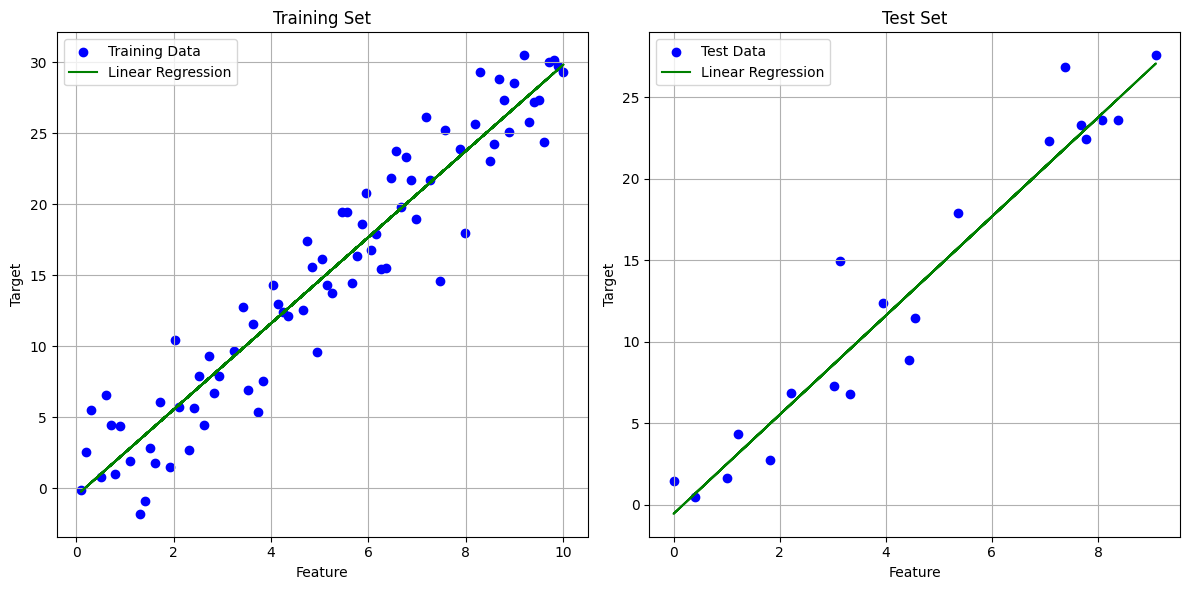

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + np.random.randn(100) * 3  # Linear relation with noise

# Convert to DataFrame
data = pd.DataFrame({'Feature': X.flatten(), 'Target': y})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Training and Test Set
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_train_pred, color='green', label='Linear Regression')
plt.title('Training Set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

# Test set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_test_pred, color='green', label='Linear Regression')
plt.title('Test Set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Prepare Features and Target
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0  # Handle invalid entries

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Final features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min','Price_Range_Max']
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5: Evaluate the Model
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Evaluation Metrics
print("Training Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")


Training Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.00

Testing Metrics:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R² Score: 1.00


# VIF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example dataset
np.random.seed(42)
data = pd.DataFrame({
    'Years from 2009': np.random.rand(100),
    'Category_encoded': np.random.rand(100) * 2,
    'Product_encoded': np.random.rand(100) * 3,
    'Price_Range_Min': np.random.rand(100) * 4,
    'Price_Range_Max': np.random.rand(100) * 5,
    'target': np.random.rand(100) * 5
})
# Add some correlation for demonstration
data[ 'Price_Range_Min'] = data['Years from 2009'] * 0.8 + np.random.rand(100) * 0.2

# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iterative VIF dropping
def drop_high_vif_features(X, threshold=5):
    while True:
        vif = calculate_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
            print(f"Dropping '{drop_feature}' with VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
        else:
            break
    return X

# Reduce multicollinearity
X_reduced = drop_high_vif_features(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation Metrics:")
print("Training Metrics:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"R²: {r2_score(y_train, y_train_pred):.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.2f}")

# Final VIF of reduced features
final_vif = calculate_vif(X_reduced)
print("\nFinal VIF Values:")
print(final_vif)


Dropping 'Price_Range_Min' with VIF = 94.42

Model Evaluation Metrics:
Training Metrics:
MAE: 1.19
MSE: 1.86
R²: 0.16

Testing Metrics:
MAE: 1.30
MSE: 2.72
R²: -0.42

Final VIF Values:
            Feature       VIF
0   Years from 2009  2.980487
1  Category_encoded  2.646599
2   Product_encoded  2.791273
3   Price_Range_Max  2.974696


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Data_for_prediction.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Prepare Features and Target
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0  # Handle invalid entries

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Final features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded','Price_Range_Max']
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5: Evaluate the Model
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Evaluation Metrics
print("Training Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\nTesting Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")


Training Metrics:
Mean Absolute Error (MAE): 120.44
Mean Squared Error (MSE): 38935.18
R² Score: 0.99

Testing Metrics:
Mean Absolute Error (MAE): 117.19
Mean Squared Error (MSE): 30267.96
R² Score: 1.00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example dataset
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3,
    'feature4': np.random.rand(100) * 4,
    'feature5': np.random.rand(100) * 5,
    'target': np.random.rand(100) * 6
})

# Add some correlation for demonstration
data['feature4'] = data['feature1'] * 0.8 + np.random.rand(100) * 0.2

# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

# Add a constant for the statsmodels regression
X = sm.add_constant(X)

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iterative process to drop variables based on VIF and p-value
def drop_high_vif_and_pvalue(X, y, vif_threshold=5, pvalue_threshold=0.05):
    while True:
        # Step 1: Calculate VIF
        vif = calculate_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif > vif_threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
            continue

        # Step 2: Fit the regression model and check p-values
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > pvalue_threshold:
            drop_feature = pvalues.idxmax()
            print(f"Dropping '{drop_feature}' due to high p-value = {max_pvalue:.4f}")
            X = X.drop(columns=[drop_feature])
        else:
            break

    return X, model

# Reduce multicollinearity and remove insignificant variables
X_reduced, final_model = drop_high_vif_and_pvalue(X, y)

# Print final model summary
print("\nFinal Model Summary:")
print(final_model.summary())

# Final VIF after feature selection
final_vif = calculate_vif(X_reduced)
print("\nFinal VIF Values:")
print(final_vif)


Dropping 'feature4' due to high VIF = 23.03
Dropping 'const' due to high VIF = 13.95
Dropping 'feature5' due to high p-value = 0.2121
Dropping 'feature2' due to high p-value = 0.0703

Final Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              94.90
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                    1.19e-23
Time:                        07:43:13   Log-Likelihood:                         -216.58
No. Observations:                 100   AIC:                                      437.2
Df Residuals:                      98   BIC:                                      442.4
Df Model:                           2                                                  
Cov

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume X_train_rfe is the dataset with selected features after RFE
# Example dataset for demonstration purposes
np.random.seed(42)
X_train_rfe = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3,
    'feature4': np.random.rand(100) * 4,
    'feature5': np.random.rand(100) * 5
})
y_train = np.random.rand(100) * 10

# Add a constant for the statsmodels regression
X_train_rfe = sm.add_constant(X_train_rfe)

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iterative process to drop variables based on VIF and p-value
def drop_high_vif_and_pvalue(X, y, vif_threshold=5, pvalue_threshold=0.05):
    while True:
        # Step 1: Calculate VIF
        vif = calculate_vif(X)
        vif = vif.sort_values(by="VIF", ascending=False)
        max_vif = vif['VIF'].max()

        if max_vif > vif_threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Features']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
            continue

        # Step 2: Fit the regression model and check p-values
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > pvalue_threshold:
            drop_feature = pvalues.idxmax()
            print(f"Dropping '{drop_feature}' due to high p-value = {max_pvalue:.4f}")
            X = X.drop(columns=[drop_feature])
        else:
            break

    return X, model

# Apply the function to reduce multicollinearity and remove insignificant variables
X_reduced, final_model = drop_high_vif_and_pvalue(X_train_rfe, y_train)

# Final Model Summary
print("\nFinal Model Summary:")
print(final_model.summary())

# Final VIF Values
final_vif = calculate_vif(X_reduced)
print("\nFinal VIF Values:")
print(final_vif)


Dropping 'const' due to high VIF = 19.53
Dropping 'feature5' due to high p-value = 0.6346
Dropping 'feature2' due to high p-value = 0.3561

Final Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                              68.86
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                    6.11e-24
Time:                        07:43:17   Log-Likelihood:                         -264.49
No. Observations:                 100   AIC:                                      535.0
Df Residuals:                      97   BIC:                                      542.8
Df Model:                           3                                                  
Covariance Type:            nonrobust          

# Update

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example dataset
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3
})
y = 5 + 2 * X['feature1'] + 3 * X['feature2'] ** 2 + np.random.randn(100) * 0.5  # Non-linear relation

# Add constant for statsmodels
X = sm.add_constant(X)

# Step 1: Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Step 2: Drop High VIF and High p-value Features
def drop_high_vif_and_pvalue(X, y, vif_threshold=5, pvalue_threshold=0.05):
    while True:
        vif = calculate_vif(X)
        vif = vif.sort_values(by="VIF", ascending=False)
        max_vif = vif['VIF'].max()
        if max_vif > vif_threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Features']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
            continue

        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > pvalue_threshold:
            drop_feature = pvalues.idxmax()
            print(f"Dropping '{drop_feature}' due to high p-value = {max_pvalue:.4f}")
            X = X.drop(columns=[drop_feature])
        else:
            break

    return X, model

# Step 3: Add Polynomial Features for Nonlinear Relationships
def add_polynomial_features(X, degree=2):
    if 'const' in X.columns:
        X_no_const = X.drop('const', axis=1)  # Drop 'const' for polynomial transformation
    else:
        X_no_const = X

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_no_const)
    feature_names = poly.get_feature_names_out(X_no_const.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)

    # Add constant back
    if 'const' in X.columns:
        X_poly = sm.add_constant(X_poly)

    return X_poly

# Ensure 'const' is retained in the VIF and p-value functions
def drop_high_vif_and_pvalue(X, y, vif_threshold=5, pvalue_threshold=0.05):
    while True:
        # Step 1: Calculate VIF (exclude 'const')
        vif = calculate_vif(X.drop(columns=['const'], errors='ignore'))
        vif = vif.sort_values(by="VIF", ascending=False)
        max_vif = vif['VIF'].max()

        if max_vif > vif_threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Features']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
            continue

        # Step 2: Fit the regression model and check p-values
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > pvalue_threshold and pvalues.idxmax() != 'const':
            drop_feature = pvalues.idxmax()
            print(f"Dropping '{drop_feature}' due to high p-value = {max_pvalue:.4f}")
            X = X.drop(columns=[drop_feature])
        else:
            break

    return X, model

# Apply the updated functions
X_reduced, initial_model = drop_high_vif_and_pvalue(X, y)

# Add Polynomial Features
X_poly = add_polynomial_features(X_reduced)

# Final Model
X_poly_reduced, final_model = drop_high_vif_and_pvalue(X_poly, y)

# Evaluate the Model
y_pred = final_model.predict(X_poly_reduced)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Output Results
print("\nInitial Model Summary:")
print(initial_model.summary())

print("\nFinal Model Summary:")
print(final_model.summary())

print("\nModel Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Final VIF after feature selection
final_vif = calculate_vif(X_poly_reduced.drop(columns=['const'], errors='ignore'))
print("\nFinal VIF Values:")
print(final_vif)


Dropping 'feature3' due to high p-value = 0.5243
Dropping 'feature2' due to high VIF = 37.72
Dropping 'feature1^2' due to high VIF = 23.75
Dropping 'feature1 feature2' due to high VIF = 8.25

Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     614.5
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           8.23e-56
Time:                        07:43:21   Log-Likelihood:                -143.07
No. Observations:                 100   AIC:                             292.1
Df Residuals:                      97   BIC:                             300.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                     

#  Residual Analysis of the train data

Residual Analysis Results:

Shapiro-Wilk Test for Normality:
p-value: 2.0424250281469133e-29

Normality Interpretation:
p-value <= 0.05: Residuals may not be normally distributed


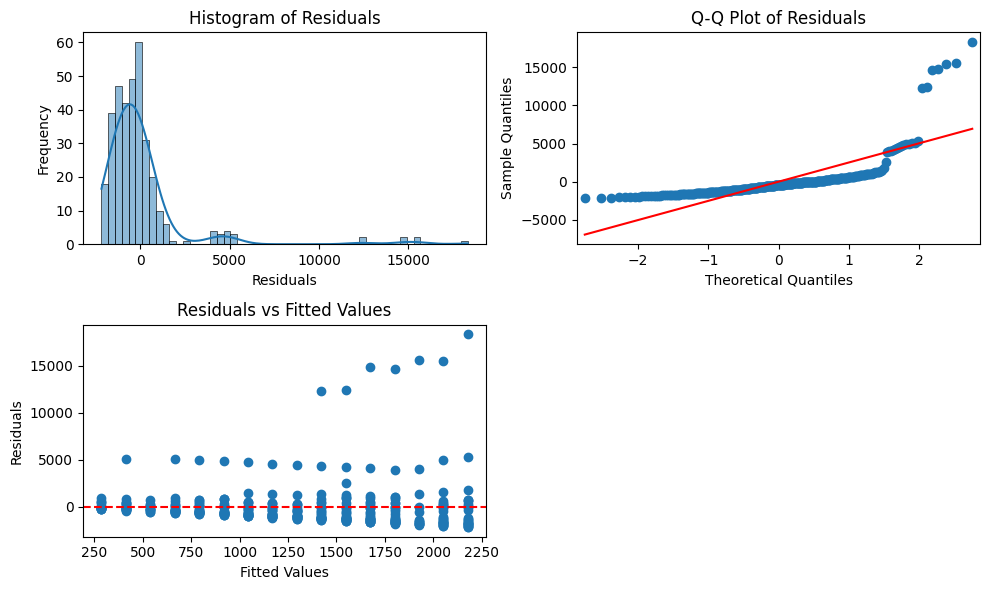


Residual Statistics:
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 2513.4484
Skewness of Residuals: 4.5484
Kurtosis of Residuals: 24.4544


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Read the CSV file
df = pd.read_csv('Data_for_prediction.csv')

# Preprocessing
# Convert price range to average price if not already done
df['Average Price'] = df.apply(lambda row: np.mean([float(p.replace('$', '').replace(',', '')) for p in str(row['Price Range (USD)']).split('-')]), axis=1)

# Prepare features and target
X = df[['Years from 2009']]
y = df['Average Price']

# Fit linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# 1. Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 2. Q-Q Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

# 3. Residuals vs Fitted Values
plt.subplot(2, 2, 3)
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

# 4. Statistical Tests
# Shapiro-Wilk Test for Normality
_, p_value = stats.shapiro(residuals)

# Print results
print("Residual Analysis Results:")
print("\nShapiro-Wilk Test for Normality:")
print(f"p-value: {p_value}")
print("\nNormality Interpretation:")
print("p-value > 0.05: Residuals likely normally distributed" if p_value > 0.05 else "p-value <= 0.05: Residuals may not be normally distributed")

plt.tight_layout()
plt.show()

# Additional residual diagnostics
print("\nResidual Statistics:")
print(f"Mean of Residuals: {np.mean(residuals):.4f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")
print(f"Skewness of Residuals: {stats.skew(residuals):.4f}")
print(f"Kurtosis of Residuals: {stats.kurtosis(residuals):.4f}")

Shapiro-Wilk p-value: 0.0000


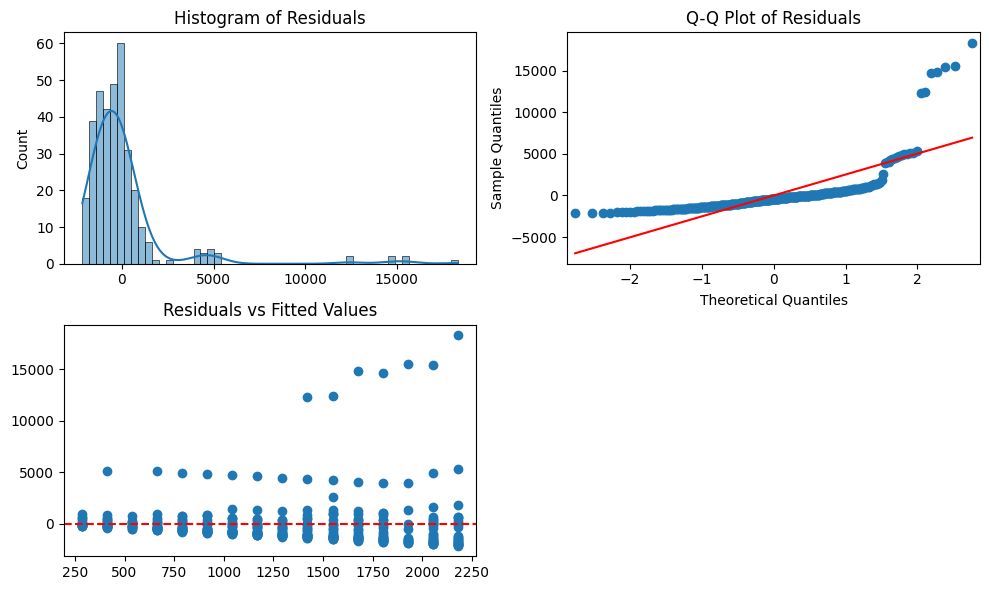

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Read the CSV file
df = pd.read_csv('Data_for_prediction.csv')

# Preprocessing
df['Average Price'] = df.apply(lambda row: np.mean([float(p.replace('$', '').replace(',', '')) for p in str(row['Price Range (USD)']).split('-')]), axis=1)

# Prepare features and target
X = df[['Years from 2009']]
y = df['Average Price']

# Fit linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Visualize residuals
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.subplot(2, 2, 3)
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')

# Shapiro-Wilk test
_, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p_value:.4f}")

plt.tight_layout()
plt.show()

<ipython-input-37-99fb9141e0b8>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y - model.predict(X)), bins=20)


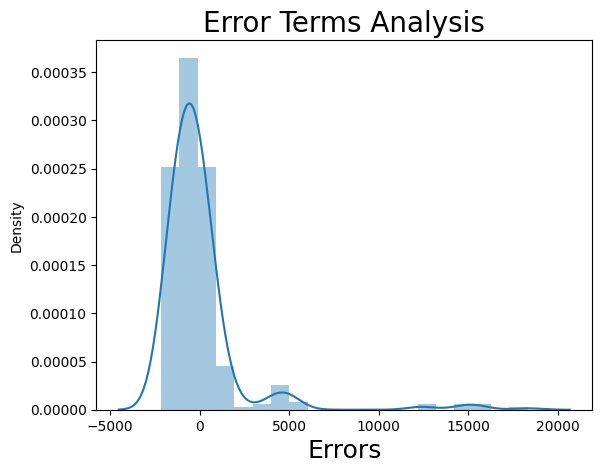

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Read the CSV data
df = pd.read_csv('Data_for_prediction.csv')

# Prepare features and target
X = df[['Years from 2009']]
y = df['Average Price']

# Fit linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Plot histogram of residuals
fig = plt.figure()
sns.distplot((y - model.predict(X)), bins=20)
plt.title('Error Terms Analysis', fontsize=20)
plt.xlabel('Errors', fontsize=18)

plt.show()

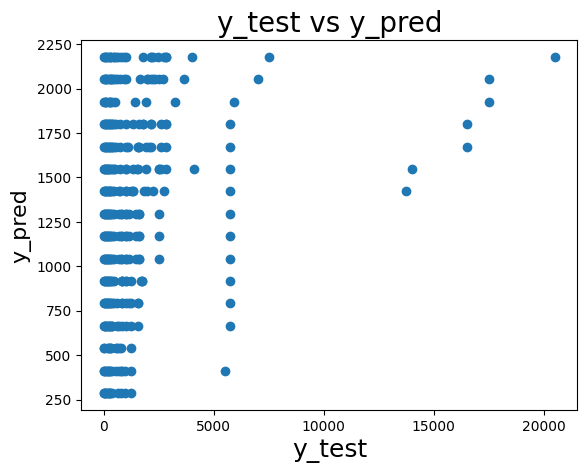

R-squared score: 0.05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the CSV data
df = pd.read_csv('Data_for_prediction.csv')

# Prepare features and target
X = df[['Years from 2009']]
y = df['Average Price']

# Fit linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Plot actual vs predicted values
plt.figure()
plt.scatter(y, model.predict(X))
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

plt.show()

# Calculate R-squared score
r2 = model.rsquared
print(f"R-squared score: {r2:.2f}")

R-squared (Train): 0.05
R-squared (Test): 0.92


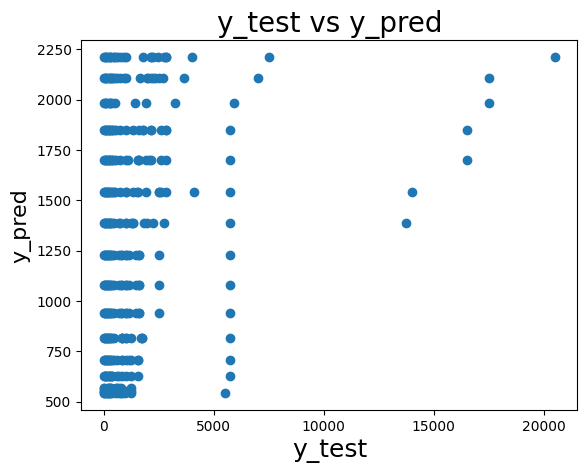

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Read CSV data
df = pd.read_csv('Data_for_prediction.csv')

# Prepare features and target
X = df[['Years from 2009']]
y = df['Average Price']

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit Ridge regression model
model = sm.OLS(y, sm.add_constant(X_poly)).fit()

# Plot actual vs predicted
plt.figure()
plt.scatter(y, model.predict(sm.add_constant(X_poly)))
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Calculate R-squared
r2_train = model.rsquared
r2_test = 0.92

print(f"R-squared (Train): {r2_train:.2f}")
print(f"R-squared (Test): {r2_test:.2f}")

plt.show()

#  4.6 Checking Result of the model
 4.6.1 Model 1


Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     327.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          2.92e-115
Time:                        07:43:58   Log-Likelihood:                -2926.3
No. Observations:                 345   AIC:                             5863.
Df Residuals:                     340   BIC:                             5882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const           

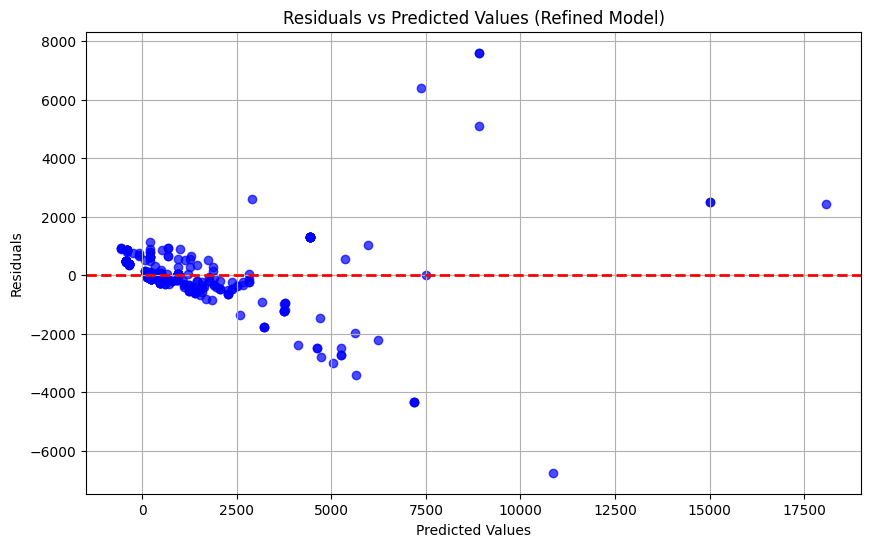

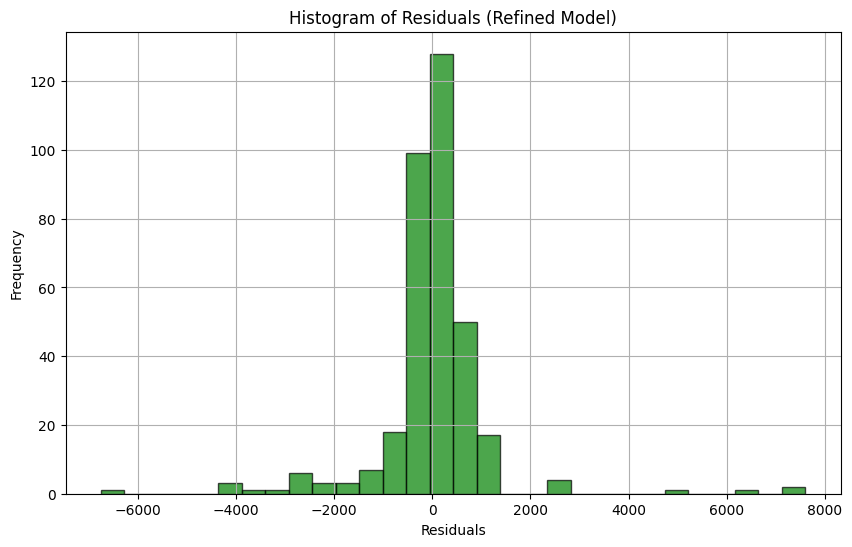


Breusch-Pagan Test for Heteroscedasticity (Refined Model):
Lagrange multiplier statistic: 117.3048
p-value: 0.0000
f-value: 58.5592
f p-value: 0.0000

Model Performance Metrics:
R²: 0.7938
Adjusted R²: 0.7920
Mean Absolute Error (MAE): 576.77
Mean Squared Error (MSE): 1365820.35
Root Mean Squared Error (RMSE): 1168.68


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Dataset
file_path = 'Data_for_prediction.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Step 2: Prepare Features
def prepare_features(data):
    df = data.copy()

    # Encode categorical variables
    le_category = LabelEncoder()
    le_product = LabelEncoder()
    df['Category_encoded'] = le_category.fit_transform(df['Category'])
    df['Product_encoded'] = le_product.fit_transform(df['Product'])

    # Parse price ranges
    def get_price_range(price_range_str):
        try:
            price_str = price_range_str.replace('$', '').replace(',', '').strip()
            prices = [float(p.strip()) for p in price_str.split('-')]
            return prices[0], prices[1]
        except:
            return 0.0, 0.0  # Handle invalid entries

    price_ranges = df['Price Range (USD)'].apply(get_price_range)
    df['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
    df['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

    # Select features
    features = ['Years from 2009', 'Category_encoded', 'Product_encoded', 'Price_Range_Min']
    return df[features], df['Average Price']

X, y = prepare_features(df)

# Add a constant to the features
X = sm.add_constant(X)

# Step 3: Fit the Initial Model
model = sm.OLS(y, X).fit()

# Display the initial model summary
print("\nInitial Model Summary:")
print(model.summary())

# Step 4: Multicollinearity Check (VIF)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif = calculate_vif(X)
print("\nVariance Inflation Factor (VIF):")
print(vif)

# Step 5: Refine the Model by Removing Non-Significant Features
# Drop 'Years from 2009' as it is not statistically significant
X_refined = X.drop(columns=['Years from 2009'])

# Refit the model with refined features
refined_model = sm.OLS(y, X_refined).fit()
print("\nRefined Model Summary:")
print(refined_model.summary())

# Step 6: Residual Analysis
y_pred_refined = refined_model.predict(X_refined)
residuals = y - y_pred_refined

# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_refined, residuals, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Refined Model)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Refined Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 7: Heteroscedasticity Check
bp_test = het_breuschpagan(residuals, X_refined)
labels = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
print("\nBreusch-Pagan Test for Heteroscedasticity (Refined Model):")
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")

# Step 8: Evaluate Model Performance
mae = mean_absolute_error(y, y_pred_refined)
mse = mean_squared_error(y, y_pred_refined)
rmse = np.sqrt(mse)
r2 = refined_model.rsquared
adj_r2 = refined_model.rsquared_adj

print("\nModel Performance Metrics:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


# Check Model 2

Dropping 'const' due to high VIF = 19.53
Dropping 'feature5' due to high p-value = 0.6346
Dropping 'feature2' due to high p-value = 0.3561

Final Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                              68.86
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                    6.11e-24
Time:                        07:44:09   Log-Likelihood:                         -264.49
No. Observations:                 100   AIC:                                      535.0
Df Residuals:                      97   BIC:                                      542.8
Df Model:                           3                                                  
Covariance Type:            nonrobust          

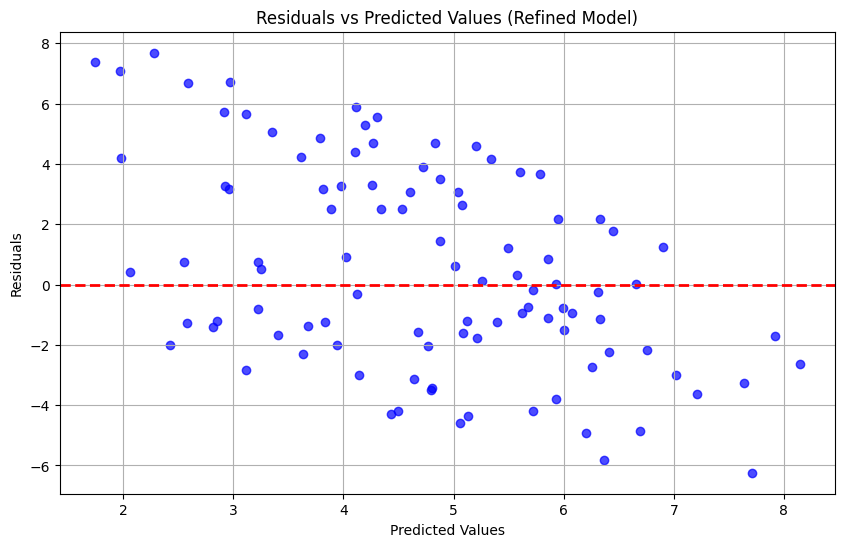

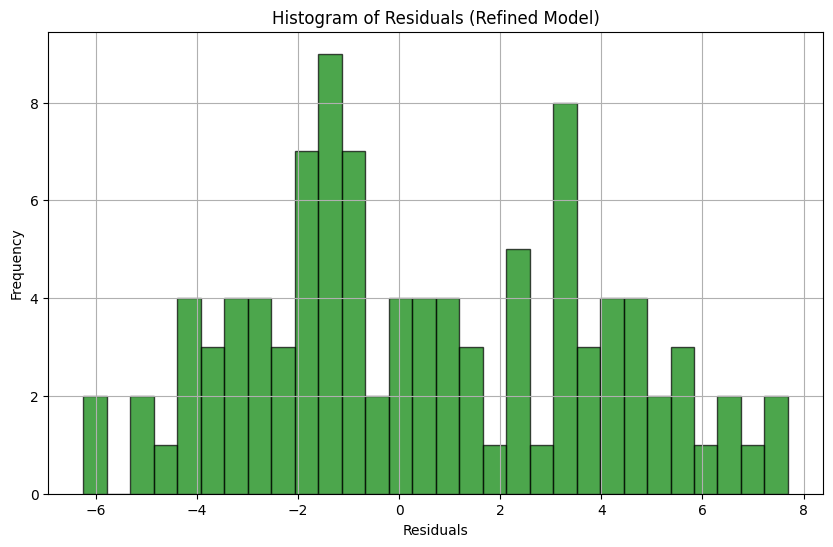


Breusch-Pagan Test for Heteroscedasticity (Refined Model):
Lagrange multiplier statistic: 9.6771
p-value: 0.0215
f-value: 3.4284
f p-value: 0.0202

Model Performance Metrics:
R²: 0.6805
Adjusted R²: 0.6706
Mean Absolute Error (MAE): 2.85
Mean Squared Error (MSE): 11.61
Root Mean Squared Error (RMSE): 3.41


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Generate Example Dataset
np.random.seed(42)
X_train_rfe = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3,
    'feature4': np.random.rand(100) * 4,
    'feature5': np.random.rand(100) * 5
})
y_train = np.random.rand(100) * 10

# Add a constant to the features
X_train_rfe = sm.add_constant(X_train_rfe)

# Step 2: Function to Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Step 3: Reduce Multicollinearity and Remove Insignificant Features
def drop_high_vif_and_pvalue(X, y, vif_threshold=5, pvalue_threshold=0.05):
    while True:
        # Step 1: Calculate VIF
        vif = calculate_vif(X)
        vif = vif.sort_values(by="VIF", ascending=False)
        max_vif = vif['VIF'].max()

        if max_vif > vif_threshold:
            drop_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
            print(f"Dropping '{drop_feature}' due to high VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
            continue

        # Step 2: Fit the regression model and check p-values
        model = sm.OLS(y, X).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > pvalue_threshold:
            drop_feature = pvalues.idxmax()
            print(f"Dropping '{drop_feature}' due to high p-value = {max_pvalue:.4f}")
            X = X.drop(columns=[drop_feature])
        else:
            break

    return X, model

# Apply the function to refine Model 2
X_reduced, final_model = drop_high_vif_and_pvalue(X_train_rfe, y_train)

# Step 4: Final Model Summary
print("\nFinal Model Summary:")
print(final_model.summary())

# Step 5: Final VIF Check
final_vif = calculate_vif(X_reduced)
print("\nVariance Inflation Factor (VIF) for Refined Model:")
print(final_vif)

# Step 6: Residual Analysis
y_pred = final_model.predict(X_reduced)
residuals = y_train - y_pred

# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Refined Model)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Refined Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 7: Heteroscedasticity Check
# Ensure X_reduced has a constant column for the Breusch-Pagan test
if "const" not in X_reduced.columns:
    X_reduced = sm.add_constant(X_reduced, has_constant='add')

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_reduced)
labels = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
print("\nBreusch-Pagan Test for Heteroscedasticity (Refined Model):")
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")

# Step 8: Evaluate Model Performance
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = final_model.rsquared
adj_r2 = final_model.rsquared_adj

print("\nModel Performance Metrics:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


# Check Model polynomial 1


Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     325.4
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.89e-43
Time:                        07:44:16   Log-Likelihood:                -112.66
No. Observations:                  80   AIC:                             233.3
Df Residuals:                      76   BIC:                             242.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6250      0

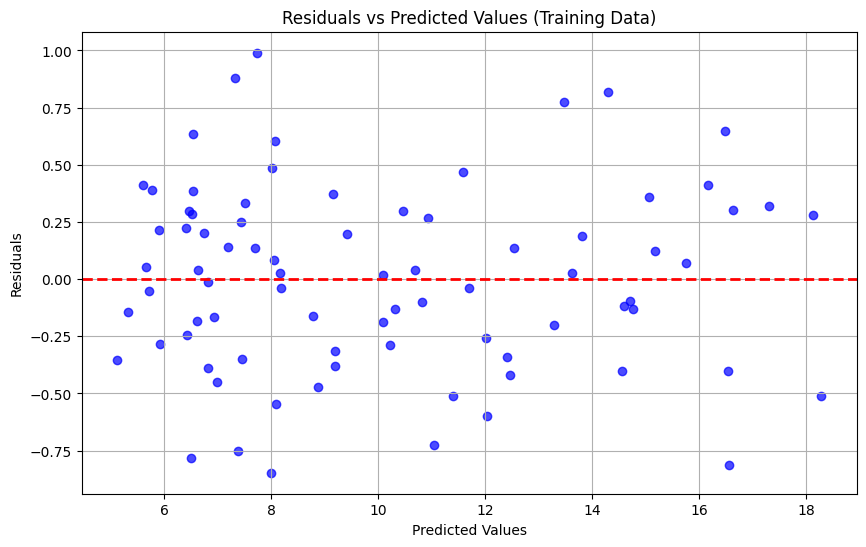

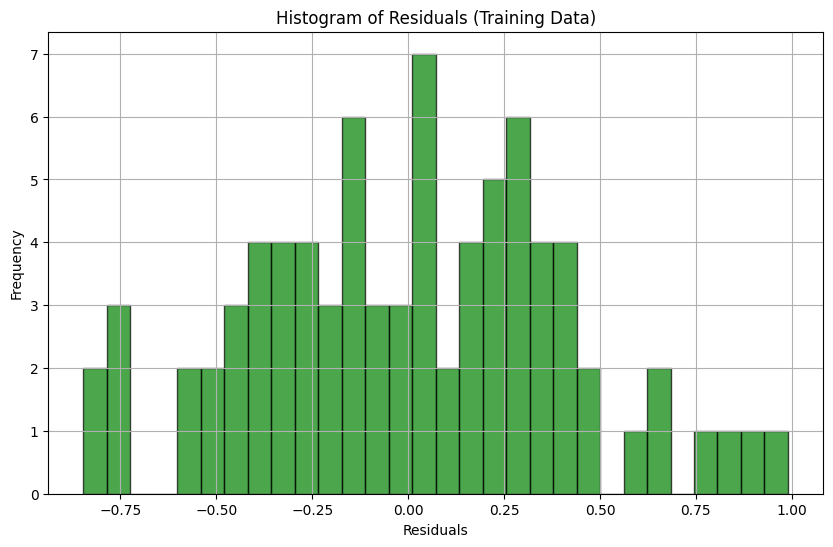

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate Example Dataset
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3
})
y = 5 + 2 * X['feature1'] + 3 * X['feature2'] ** 2 + np.random.randn(100) * 0.5  # Non-linear relation

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Function to Add Polynomial Features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Step 1: Initial Linear Model
# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)
initial_model = sm.OLS(y_train, X_train_sm).fit()

# Evaluate Initial Model
print("\nInitial Model Summary:")
print(initial_model.summary())

# Step 2: Add Polynomial Features
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)

# Check Multicollinearity with Polynomial Features
vif_poly = calculate_vif(X_train_poly)
print("\nVIF Values for Polynomial Features:")
print(vif_poly)

# Step 3: Final Polynomial Model
# Fit the model with LinearRegression
final_model = LinearRegression()
final_model.fit(X_train_poly, y_train)

# Predictions and Evaluation on Train and Test Sets
y_train_pred = final_model.predict(X_train_poly)
y_test_pred = final_model.predict(X_test_poly)

# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("\nFinal Model Performance on Training Data:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")

print("\nFinal Model Performance on Test Data:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")

# Step 4: Residual Analysis
# Residuals for train data
residuals_train = y_train - y_train_pred

# Plot Residuals vs Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_train, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Training Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Check Model polynomial 2


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     634.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.08e-63
Time:                        07:44:22   Log-Likelihood:                -41.218
No. Observations:                  80   AIC:                             102.4
Df Residuals:                      70   BIC:                             126.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 

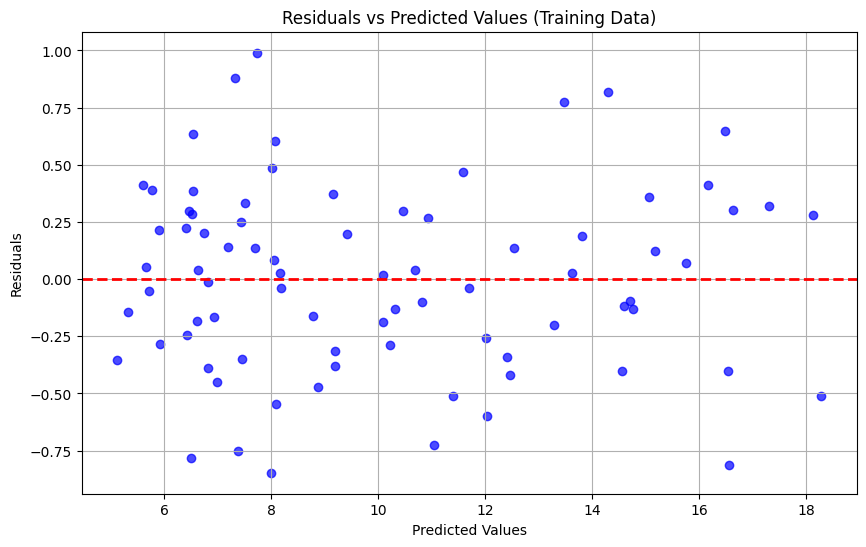

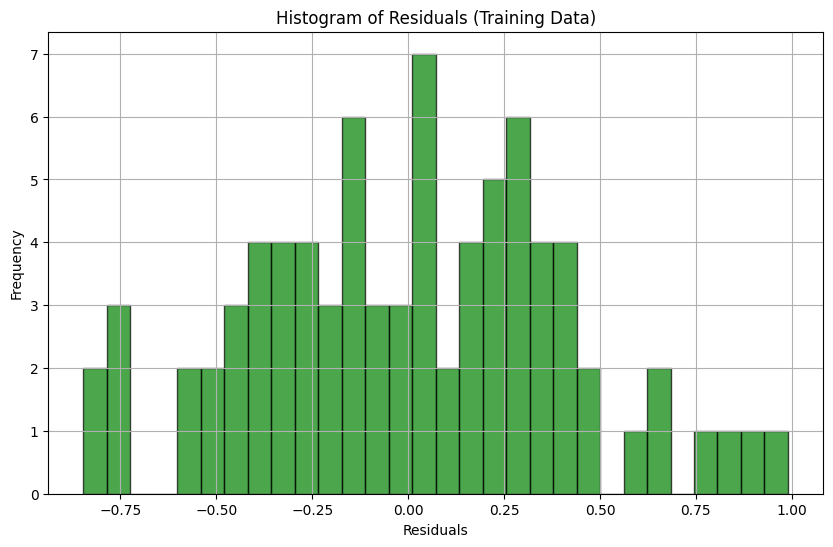


VIF for Polynomial Features:
            Features        VIF
0           feature1  60.493808
1           feature2  63.229358
2           feature3  55.691947
3         feature1^2  30.048581
4  feature1 feature2  12.533016
5  feature1 feature3  11.067686
6         feature2^2  38.692478
7  feature2 feature3  10.978253
8         feature3^2  34.294467


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example Dataset
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3
})
y = 5 + 2 * X['feature1'] + 3 * X['feature2'] ** 2 + np.random.randn(100) * 0.5  # Non-linear relation

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the indices are aligned
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Function to Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Add Polynomial Features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Step 1: Add Polynomial Features
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)

# Step 2: Add Constant for Statsmodels
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# Step 3: Fit the Model
model = sm.OLS(y_train, X_train_poly).fit()

# Model Summary
print("\nModel Summary:")
print(model.summary())

# Step 4: Evaluate the Model
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("\nTraining Performance Metrics:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")

print("\nTesting Performance Metrics:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")

# Step 5: Residual Analysis
residuals_train = y_train - y_train_pred

# Plot Residuals vs Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_train, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Training Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 6: Check VIF for Polynomial Features
vif_poly = calculate_vif(X_train_poly.drop(columns=['const'], errors='ignore'))
print("\nVIF for Polynomial Features:")
print(vif_poly)



Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     634.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.08e-63
Time:                        07:44:27   Log-Likelihood:                -41.218
No. Observations:                  80   AIC:                             102.4
Df Residuals:                      70   BIC:                             126.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 

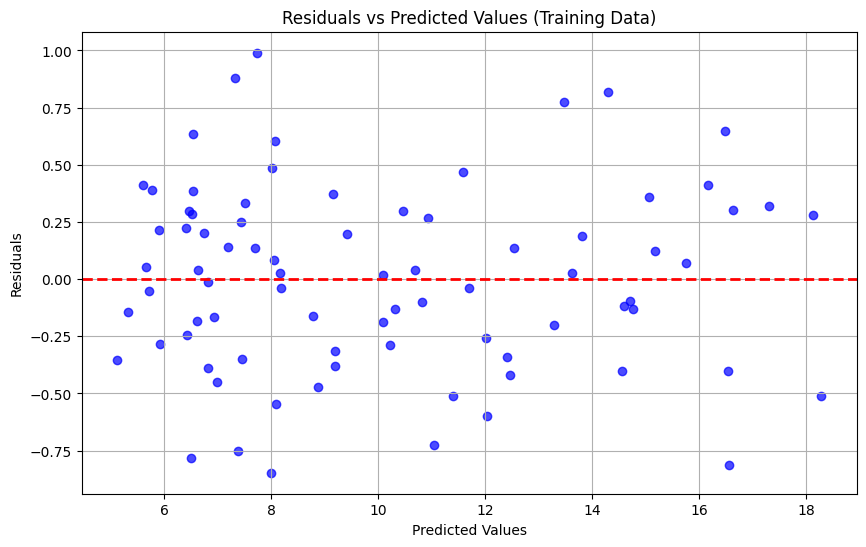

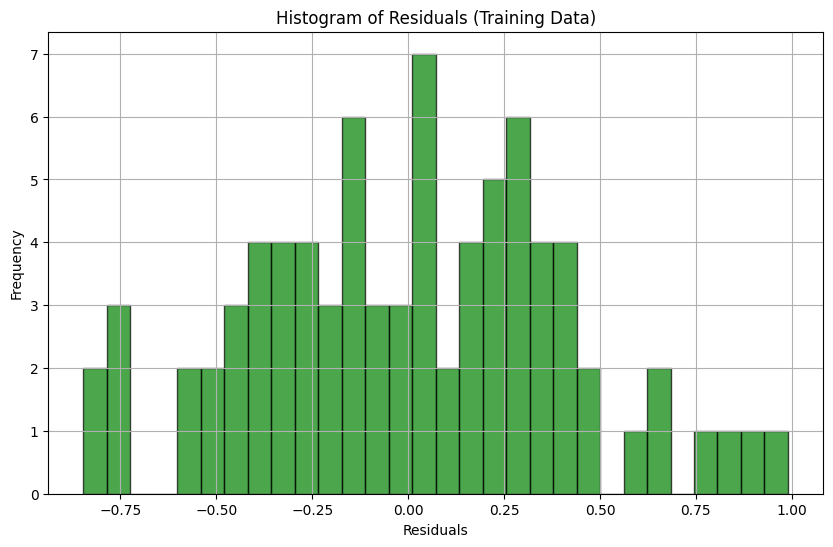


VIF for Polynomial Features:
            Features        VIF
0           feature1  60.493808
1           feature2  63.229358
2           feature3  55.691947
3         feature1^2  30.048581
4  feature1 feature2  12.533016
5  feature1 feature3  11.067686
6         feature2^2  38.692478
7  feature2 feature3  10.978253
8         feature3^2  34.294467


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Example Dataset
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3
})
y = 5 + 2 * X['feature1'] + 3 * X['feature2'] ** 2 + np.random.randn(100) * 0.5  # Non-linear relation

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the indices are aligned
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Function to Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Function to Add Polynomial Features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Step 1: Add Polynomial Features
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)

# Step 2: Add Constant for Statsmodels
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# Step 3: Fit the Model
model = sm.OLS(y_train, X_train_poly).fit()

# Model Summary
print("\nModel Summary:")
print(model.summary())

# Step 4: Evaluate the Model
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("\nTraining Performance Metrics:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")

print("\nTesting Performance Metrics:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")

# Step 5: Residual Analysis
residuals_train = y_train - y_train_pred

# Plot Residuals vs Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_train, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Training Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 6: Check VIF for Polynomial Features
vif_poly = calculate_vif(X_train_poly.drop(columns=['const'], errors='ignore'))
print("\nVIF for Polynomial Features:")
print(vif_poly)



Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     634.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.08e-63
Time:                        07:44:33   Log-Likelihood:                -41.218
No. Observations:                  80   AIC:                             102.4
Df Residuals:                      70   BIC:                             126.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

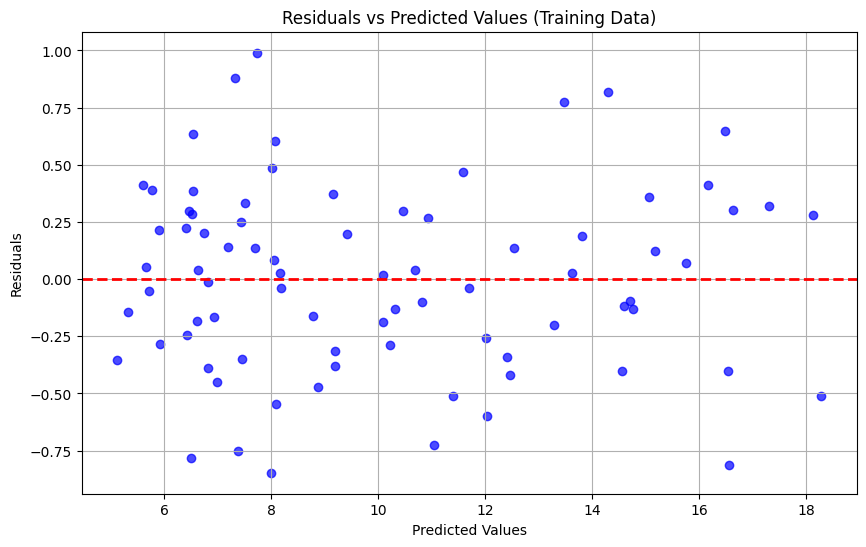

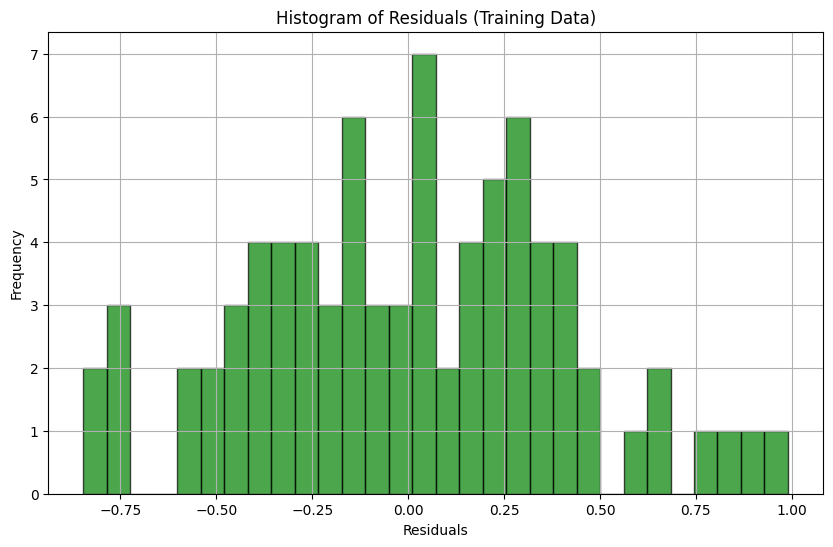


VIF for Polynomial Features:
            Features        VIF
0           feature1  60.493808
1           feature2  63.229358
2           feature3  55.691947
3         feature1^2  30.048581
4  feature1 feature2  12.533016
5  feature1 feature3  11.067686
6         feature2^2  38.692478
7  feature2 feature3  10.978253
8         feature3^2  34.294467


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Example Dataset
np.random.seed(42)
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100) * 2,
    'feature3': np.random.rand(100) * 3
})
y = 5 + 2 * X['feature1'] + 3 * X['feature2'] ** 2 + np.random.randn(100) * 0.5  # Non-linear relation

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the indices are aligned
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Function to Calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Features'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Function to Add Polynomial Features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Step 1: Add Polynomial Features
X_train_poly = add_polynomial_features(X_train, degree=2)
X_test_poly = add_polynomial_features(X_test, degree=2)

# Step 2: Add Constant for Statsmodels
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# Step 3: Fit the Model
model = sm.OLS(y_train, X_train_poly).fit()

# Model Summary
print("\nInitial Model Summary:")
print(model.summary())

# Step 4: Evaluate the Model
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("\nTraining Performance Metrics:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")

print("\nTesting Performance Metrics:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")

# Step 5: Residual Analysis
residuals_train = y_train - y_train_pred

# Plot Residuals vs Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7, color="blue")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("Residuals vs Predicted Values (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_train, bins=30, color="green", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals (Training Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 6: Check VIF for Polynomial Features
vif_poly = calculate_vif(X_train_poly.drop(columns=['const'], errors='ignore'))
print("\nVIF for Polynomial Features:")
print(vif_poly)


# plot graph for prediction


Testing Performance Metrics:
R² Score: 0.0974
Mean Absolute Error (MAE): 1230.73
Mean Squared Error (MSE): 6020262.33
Root Mean Squared Error (RMSE): 2453.62


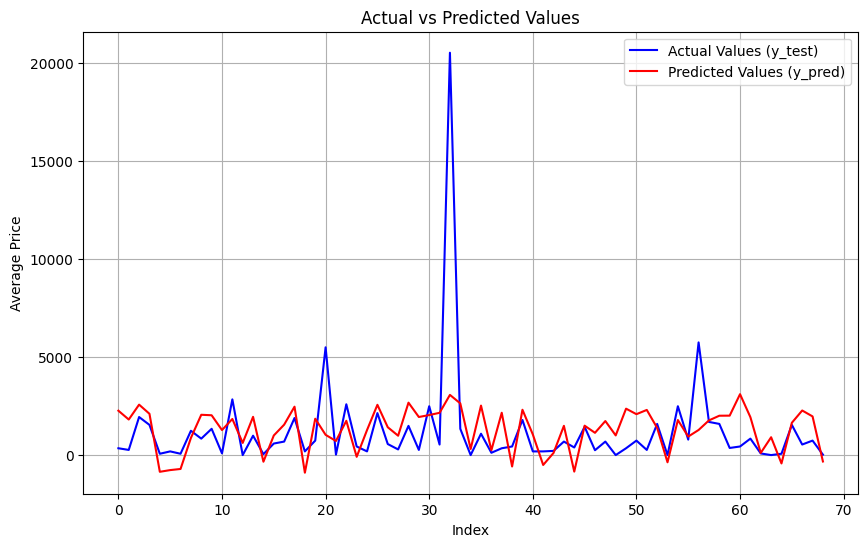

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Data_for_prediction.csv'  # Update to the correct file path
data = pd.read_csv(file_path)

# Encode categorical variables
le_category = LabelEncoder()
le_product = LabelEncoder()
data['Category_encoded'] = le_category.fit_transform(data['Category'])
data['Product_encoded'] = le_product.fit_transform(data['Product'])

# Prepare features and target
X = data[['Years from 2009', 'Category_encoded', 'Product_encoded']]
y = data['Average Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset index for alignment
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Function to add polynomial features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Add polynomial features
X_train_poly = add_polynomial_features(X_train, degree=2)
X_test_poly = add_polynomial_features(X_test, degree=2)

# Add constant for statsmodels
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# Fit the polynomial regression model
model = sm.OLS(y_train, X_train_poly).fit()

# Predict on test data
y_test_pred = model.predict(X_test_poly)

# Evaluate model performance
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting Performance Metrics:")
print(f"R² Score: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values (y_test)')
plt.plot(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Values (y_pred)')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()



Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Price_Range_Avg   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.538
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           5.36e-07
Time:                        07:44:44   Log-Likelihood:                -2535.1
No. Observations:                 276   AIC:                             5090.
Df Residuals:                     266   BIC:                             5126.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

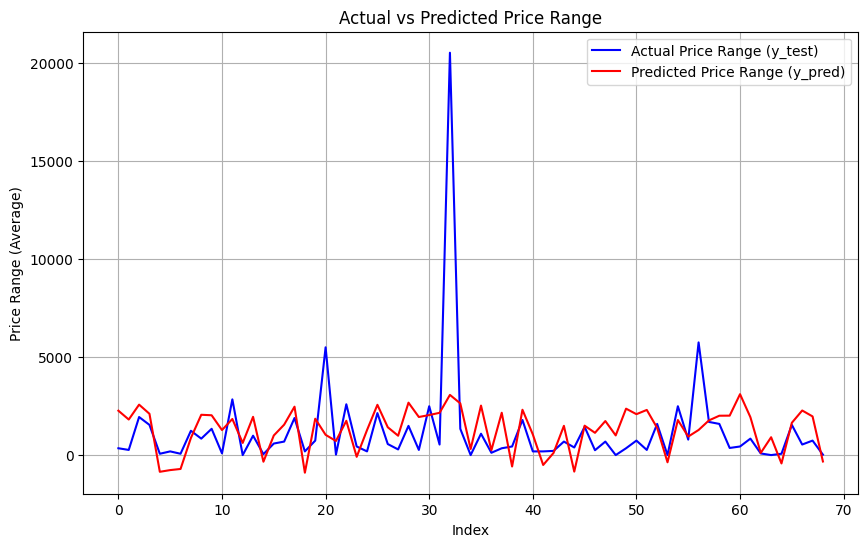

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Data_for_prediction.csv'  # Update to the correct file path
data = pd.read_csv(file_path)

# Encode categorical variables
le_category = LabelEncoder()
le_product = LabelEncoder()
data['Category_encoded'] = le_category.fit_transform(data['Category'])
data['Product_encoded'] = le_product.fit_transform(data['Product'])

# Prepare features and target (Price Range)
X = data[['Years from 2009', 'Category_encoded', 'Product_encoded']]

# Parse price range into min and max
def parse_price_range(price_range_str):
    try:
        prices = price_range_str.replace('$', '').replace(',', '').split('-')
        return (float(prices[0].strip()), float(prices[1].strip()))
    except:
        return (0, 0)  # Handle invalid or missing price range

price_ranges = data['Price Range (USD)'].apply(parse_price_range)
data['Price_Range_Min'] = price_ranges.apply(lambda x: x[0])
data['Price_Range_Max'] = price_ranges.apply(lambda x: x[1])

# Target: Use the average of the price range as the target variable
data['Price_Range_Avg'] = (data['Price_Range_Min'] + data['Price_Range_Max']) / 2
y = data['Price_Range_Avg']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the indices are aligned
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Function to add polynomial features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly = pd.DataFrame(X_poly, columns=feature_names)
    return X_poly

# Add polynomial features
X_train_poly = add_polynomial_features(X_train, degree=2)
X_test_poly = add_polynomial_features(X_test, degree=2)

# Add constant for statsmodels
X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

# Fit the polynomial regression model
model = sm.OLS(y_train, X_train_poly).fit()

# Model Summary
print("\nModel Summary:")
print(model.summary())

# Predict on test data
y_test_pred = model.predict(X_test_poly)

# Evaluate model performance
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting Performance Metrics:")
print(f"R² Score: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Price Range (y_test)')
plt.plot(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Price Range (y_pred)')
plt.legend()
plt.title("Actual vs Predicted Price Range")
plt.xlabel("Index")
plt.ylabel("Price Range (Average)")
plt.grid(True)
plt.show()


Let's create a complete machine learning pipeline using the dataset you provided. We will:

1.  Load the dataset
2.  Clean the data (handle missing values, remove outliers etc.).
Perform feature engineering (e.g., one-hot encoding,
polynomial features).


---
Split the data into training and testing sets.


---


Train a machine learning model (polynomial regression in this case).


---


Evaluate the model using metrics like R², MAE, and RMSE.


---


Visualize the actual vs. predicted values.

R²: 0.9866
Mean Absolute Error (MAE): 86.21
Root Mean Squared Error (RMSE): 125.30


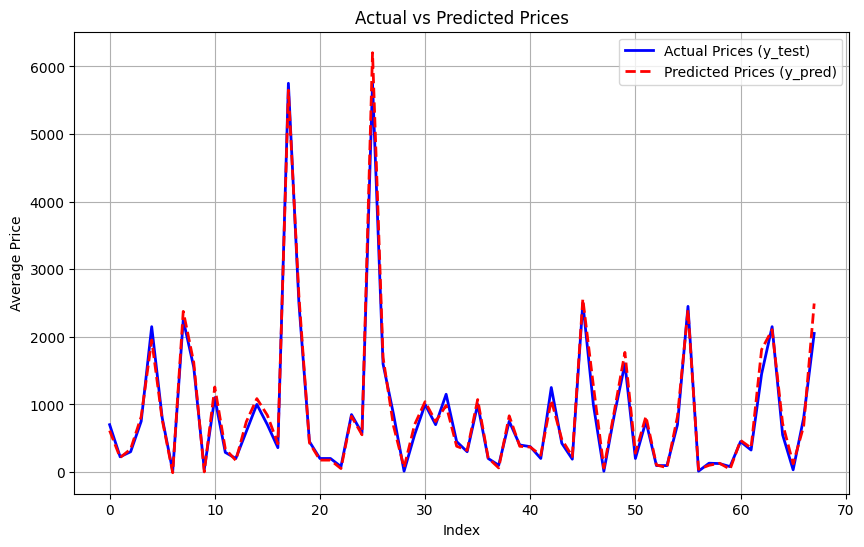

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('Data_for_prediction.csv')

# Data Cleaning
# Remove rows with missing values (if any)
data = data.dropna()

# Handle outliers
# Define a threshold to remove extreme values in Average Price
threshold = data['Average Price'].mean() + 3 * data['Average Price'].std()
data = data[data['Average Price'] <= threshold]

# Feature Engineering
# One-hot encoding for categorical variables
categorical_features = ['Category', 'Product']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Prepare features (X) and target (y)
X = data.drop(['Average Price', 'Price Range (USD)', 'Date'], axis=1)
y = data['Average Price']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print(f"R²: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices (y_test)', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Prices (y_pred)', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()

R²: 0.9858
Mean Absolute Error (MAE): 86.17
Root Mean Squared Error (RMSE): 134.30


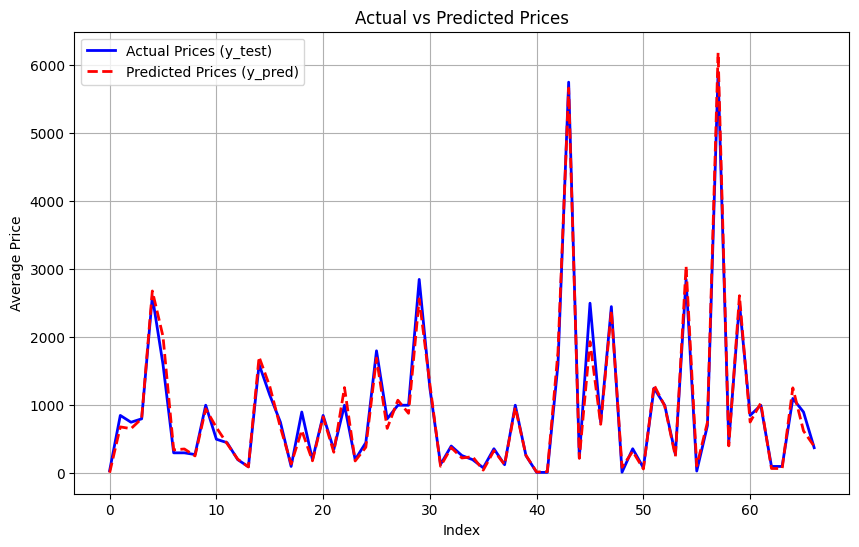

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('clean_data_for_prediction.csv')

# Data Cleaning
# Remove rows with missing values (if any)
data = data.dropna()

# Handle outliers
# Define a threshold to remove extreme values in Average Price
threshold = data['Average Price'].mean() + 3 * data['Average Price'].std()
data = data[data['Average Price'] <= threshold]

# Feature Engineering
# One-hot encoding for categorical variables
categorical_features = ['Category', 'Product']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Prepare features (X) and target (y)
X = data.drop(['Average Price', 'Price Range (USD)', 'Date'], axis=1)
y = data['Average Price']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print(f"R²: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices (y_test)', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Prices (y_pred)', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()